importing the Libraries

In [63]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as pltdates
import os
import seaborn as sns

Downloading dataset from web using yfinance

In [86]:
data = yf.download('KO',start='2015-01-01',end='2025-01-01')
data.reset_index(inplace=True)
data.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_15052\2606650229.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('KO',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,30.222614,30.409087,29.978768,30.308677,9921100
1,2015-01-05,30.222614,30.817888,30.179584,30.617071,26292600
2,2015-01-06,30.452118,30.796371,30.294337,30.416259,16897500
3,2015-01-07,30.832235,30.918298,30.538185,30.695966,13412300
4,2015-01-08,31.205166,31.248199,30.911116,30.968493,21743600


Basic Information

In [65]:
print("Basic INformation\n\n",data.info())
print()
print("First Data\n\n",data.head())
print()
print("Last 5 data\n\n",data.tail())
print()
print("Colunms :\n\n",data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2516 non-null   datetime64[ns]
 1   (Close, KO)   2516 non-null   float64       
 2   (High, KO)    2516 non-null   float64       
 3   (Low, KO)     2516 non-null   float64       
 4   (Open, KO)    2516 non-null   float64       
 5   (Volume, KO)  2516 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
Basic INformation

 None

First Data

 Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.222614  30.409087  29.978768  30.308677   9921100
1      2015-01-05  30.222614  30.817888  30.179584  30.617071  26292600
2      2015-01-06  30.452118  30.796371  30.294337  30.416259  16897500
3      2015-01-07  30.83

Checking for missing values

In [66]:
data.isnull().sum()

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64

Feature Addition

In [89]:
data['Differcence per day'] = data['High'] - data['Low']
data.columns = data.columns.get_level_values(0)
# data['Differcence per day'].head()
data['Upper wick'] = data['High'] - data[['Open', 'Close']].max(axis=1)
data['Lower wick'] = data[['Open', 'Close']].min(axis=1) - data['Low']
data['Avg Growth'] = ((data['Low']+data['High']+data["Close"]+data['Open'])/4)*data['Volume']
print(data.columns.tolist())



['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'Differcence per day', 'Upper wick', 'Lower wick', 'Avg Growth']


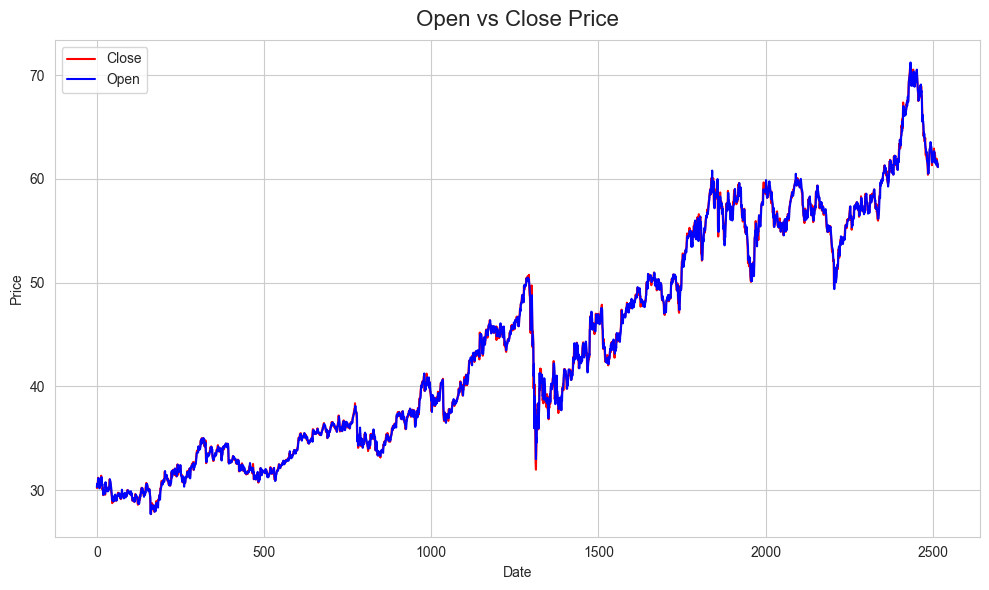

In [68]:

sns.set_style('whitegrid')  # Optional: better visuals
plt.figure(figsize=(10, 6))  # Larger size

sns.lineplot(data=data['Close'], color='red',label='Close')
sns.lineplot(data=data['Open'], color='blue', label='Open')

plt.legend()
plt.title('Open vs Close Price',fontsize=16,pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open vs Close Price.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')

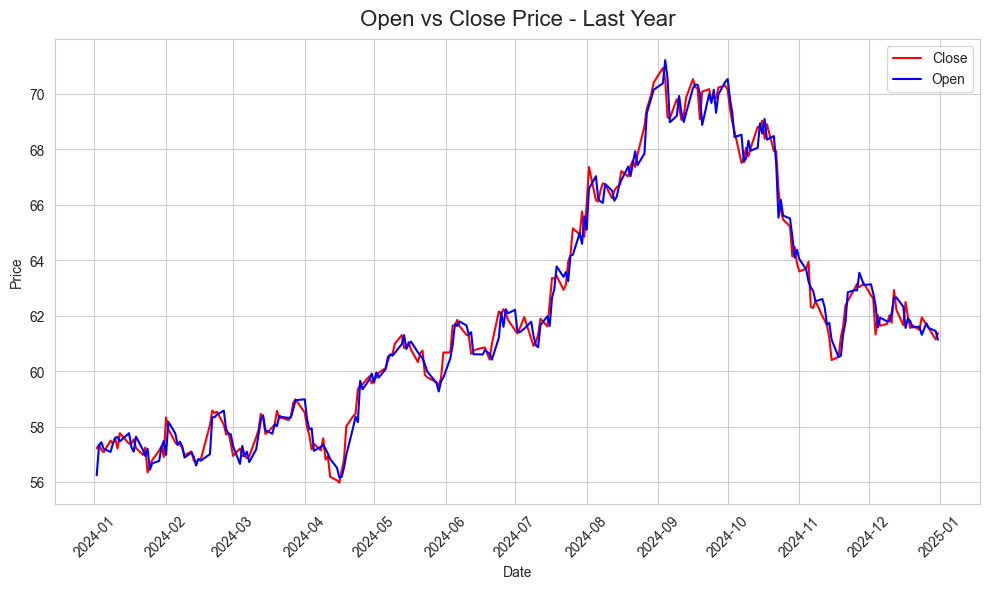

In [69]:
# Filter last year
lastyear = data.loc[data['Date'] >= data['Date'].max() - pd.DateOffset(years=1)]

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=lastyear, color='red', label='Close')
sns.lineplot(x='Date', y='Open', data=lastyear, color='blue', label='Open')

# Date formatting
ax = plt.gca()
ax.xaxis.set_major_locator(pltdates.MonthLocator(interval=1))  # one tick per month
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y-%m'))  # format: 2025-07
plt.xticks(rotation=45)

# Labels
plt.title('Open vs Close Price - Last Year',fontsize=16,pad=10)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
output_path = os.path.join('Output Images', 'Open vs Close Price - Last Year.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

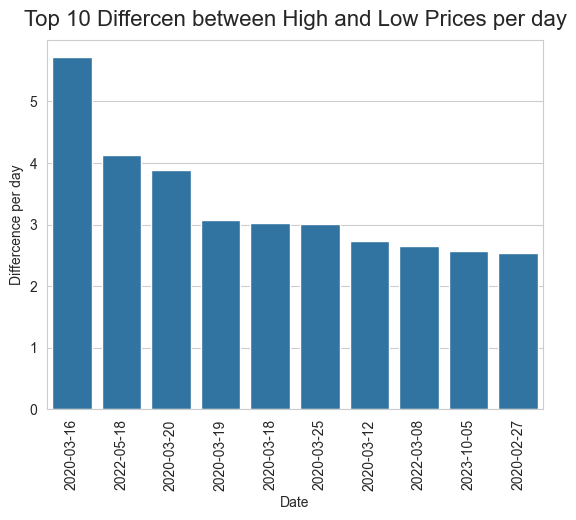

In [70]:
top10 = data.sort_values(by='Differcence per day',ascending=False).head(10)
sns.set_style('whitegrid')
plt.Figure(figsize=(5,5))
plt.title("Top 10 Differcen between High and Low Prices per day",fontsize=16,pad=10)

sns.barplot(data=top10,x=top10['Date'], y = top10['Differcence per day'])
plt.xticks(rotation=90)
output_path = os.path.join('Output Images', 'Top 10 Differcen between High and Low Prices per day.png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show

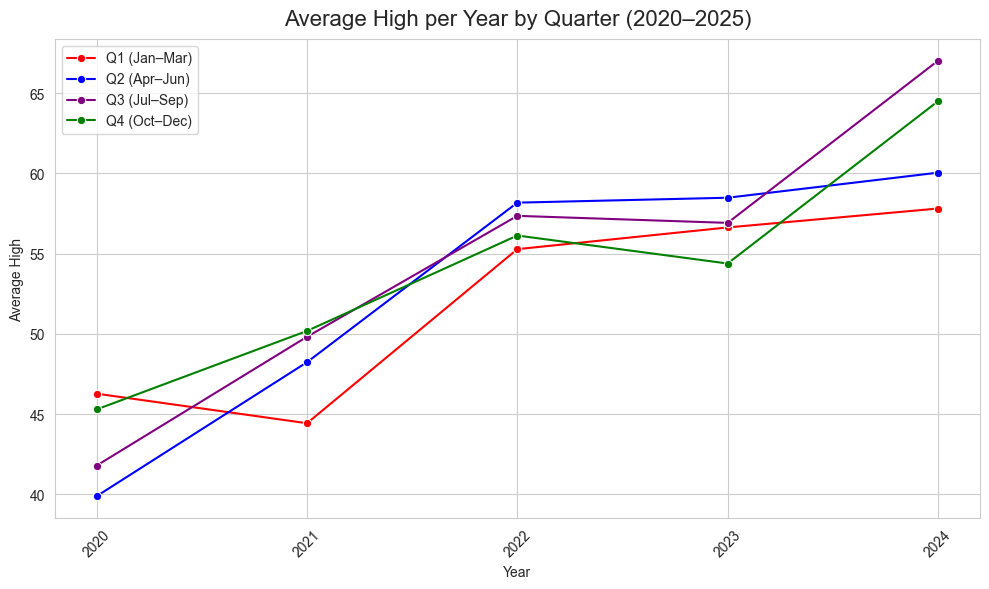

In [71]:
# Assuming your DataFrame is named 'data' and 'Date' column is already in datetime format.

# Q1: Jan–Mar
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q1 = Q1.groupby(Q1['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q1.columns = ['Year', 'High']

# Q2: Apr–Jun
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = Q2.groupby(Q2['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q2.columns = ['Year', 'High']

# Q3: Jul–Sep
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = Q3.groupby(Q3['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q3.columns = ['Year', 'High']

# Q4: Oct–Dec
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = Q4.groupby(Q4['Date'].dt.year.astype(int))['High'].mean().reset_index()
Q4.columns = ['Year', 'High']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='High', data=Q1, marker='o', color='red', label='Q1 (Jan–Mar)')
sns.lineplot(x='Year', y='High', data=Q2, marker='o', color='blue', label='Q2 (Apr–Jun)')
sns.lineplot(x='Year', y='High', data=Q3, marker='o', color='purple', label='Q3 (Jul–Sep)')
sns.lineplot(x='Year', y='High', data=Q4, marker='o', color='green', label='Q4 (Oct–Dec)')

plt.title('Average High per Year by Quarter (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('Average High')
plt.xticks(Q1['Year'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
output_path = os.path.join('Output Images', 'Average High per Year by Quarter (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

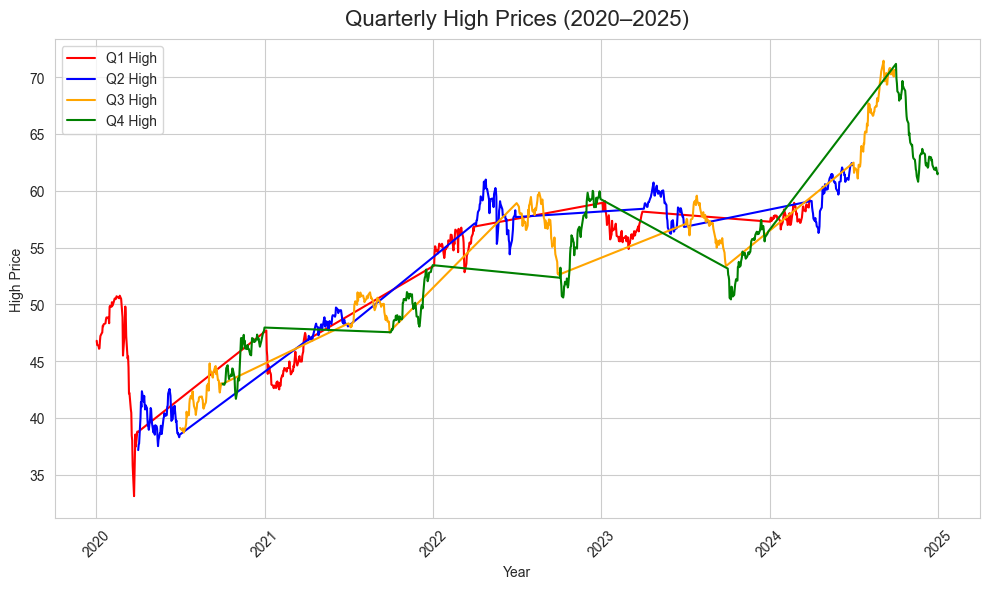

In [72]:

# Filter each quarter between 2020 and 2025
Q1 = data[(data['Date'].dt.month.isin([1, 2, 3])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q2 = data[(data['Date'].dt.month.isin([4, 5, 6])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q3 = data[(data['Date'].dt.month.isin([7, 8, 9])) & (data['Date'].between('2020-01-01', '2025-01-01'))]
Q4 = data[(data['Date'].dt.month.isin([10, 11, 12])) & (data['Date'].between('2020-01-01', '2025-01-01'))]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each quarter
sns.lineplot(x='Date', y='High', data=Q1, ax=ax, color='red', label='Q1 High')
sns.lineplot(x='Date', y='High', data=Q2, ax=ax, color='blue', label='Q2 High')
sns.lineplot(x='Date', y='High', data=Q3, ax=ax, color='orange', label='Q3 High')
sns.lineplot(x='Date', y='High', data=Q4, ax=ax, color='green', label='Q4 High')

# Formatting the X-axis with year only
ax.xaxis.set_major_locator(pltdates.YearLocator())
ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Labels and title
plt.title('Quarterly High Prices (2020–2025)',fontsize=16,pad=10)
plt.xlabel('Year')
plt.ylabel('High Price')
plt.legend()
plt.tight_layout()

# Save the plot
output_path = os.path.join('Output Images', 'Quarterly High Prices (2020–2025).png')
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()


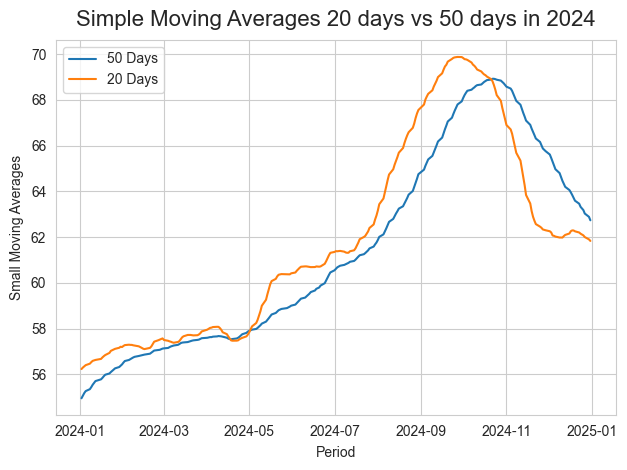

In [73]:
data["SMA_50"] = data['Close'].rolling(window=50).mean()
data["SMA_20"] = data['Close'].rolling(window=20).mean()
db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]
sns.lineplot(data=db,x=db['Date'],y=db['SMA_50'],label="50 Days")
sns.lineplot(data=db,x=db['Date'],y=db['SMA_20'],label="20 Days")

plt.title("Simple Moving Averages 20 days vs 50 days in 2024" ,fontsize=16,pad=10)
plt.xlabel('Period',fontsize=10,labelpad=5)
plt.ylabel('Small Moving Averages',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()
plt.show()



Bollinger Bands

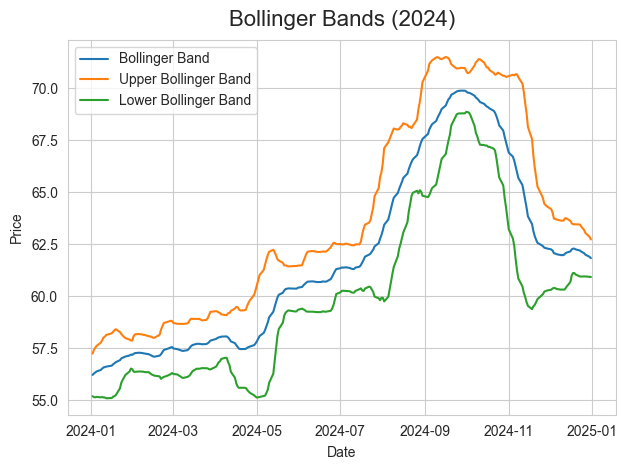

In [92]:
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_std'] = data['Close'].rolling(window=20).std()
data['BB_Upper'] = data['BB_Middle'] + (data['BB_std'] * 2)
data['BB_Lower'] = data['BB_Middle'] - (data['BB_std'] * 2)

db=data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(data=db ,x=db['Date'],y=db['BB_Middle'],label='Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Upper'],label='Upper Bollinger Band')
sns.lineplot(data=db ,x=db ['Date'],y=db ['BB_Lower'],label='Lower Bollinger Band')

plt.title('Bollinger Bands (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('Price',fontsize=10,labelpad=5)
plt.legend()
plt.tight_layout()

output_path = os.path.join('Output Images', "bollinger_bands_2024.png")
plt.savefig(output_path,dpi=300,bbox_inches='tight')
plt.show()

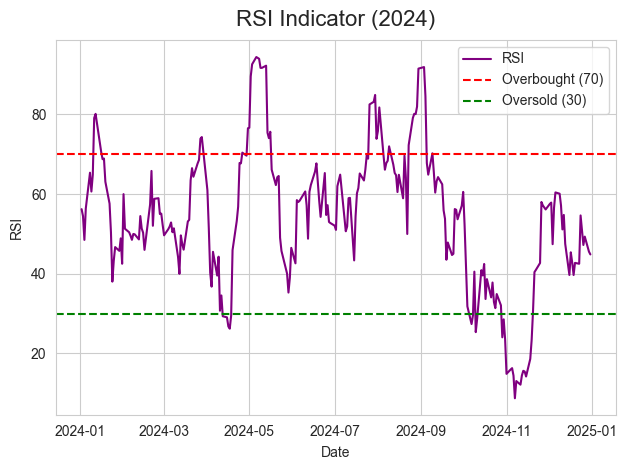

In [93]:
def cal_rsi(data,peroid=14):
    delta=data["Close"].diff()
    gain = (delta.where(delta>0,0)).fillna(0)
    loss = (-delta.where(delta<0,0)).fillna(0)
    
    avg_gain = gain.rolling(window=peroid).mean()
    avg_loss = loss.rolling(window=peroid).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 -(100/(1+rs))
    data['RSI'] = rsi
    return data

data = cal_rsi(data)
rsi_data = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2025-01-01')]


sns.lineplot(x='Date', y='RSI', data=rsi_data, color='purple', label='RSI')
plt.title('RSI Indicator (2024)', fontsize=16,pad=10)
plt.xlabel('Date',fontsize=10,labelpad=5)
plt.ylabel('RSI',fontsize=10,labelpad=5)
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.tight_layout()
plt.legend()

plt.savefig("Output Images/rsi_2024.png",dpi=300,bbox_inches='tight')
plt.show()

Comparison PepsiCo , Monster Beverage with Coca-Cola

In [87]:
# PepsiCo
data1 = yf.download('PEP',start='2015-01-01',end='2025-01-01')
data1.reset_index(inplace=True)
data1.head()
print("Num value Count for Pepsico :",data1.isnull().sum())
# Monster Beverage
data2 = yf.download('MNST',start='2015-01-01',end='2025-01-01')
data2.reset_index(inplace=True)
data2.head()
print("Num value Count for Monster Beverage :",data2.isnull().sum())
data1.columns = data1.columns.get_level_values(0)
data2.columns = data2.columns.get_level_values(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_15052\4000411600.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('PEP',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_15052\4000411600.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data2 = yf.download('MNST',start='2015-01-01',end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Num value Count for Pepsico : Price   Ticker
Date              0
Close   PEP       0
High    PEP       0
Low     PEP       0
Open    PEP       0
Volume  PEP       0
dtype: int64
Num value Count for Monster Beverage : Price   Ticker
Date              0
Close   MNST      0
High    MNST      0
Low     MNST      0
Open    MNST      0
Volume  MNST      0
dtype: int64


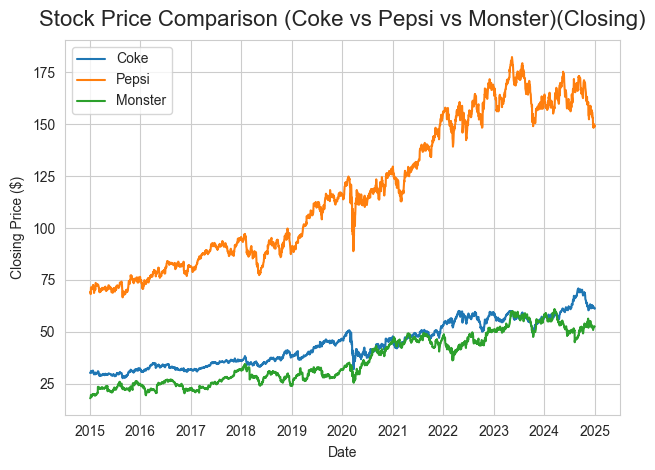

<Figure size 640x480 with 0 Axes>

In [99]:
sns.lineplot(data=data, x='Date', y='Close', label="Coke")
sns.lineplot(data=data1, x='Date', y='Close', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Close', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Closing Price ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# print(data['Close'].shape) 
# print(data1['Close'].shape) 
# print(data2['Close'].shape) 

plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Closing).png",dpi=300,bbox_inches='tight')
plt.show()

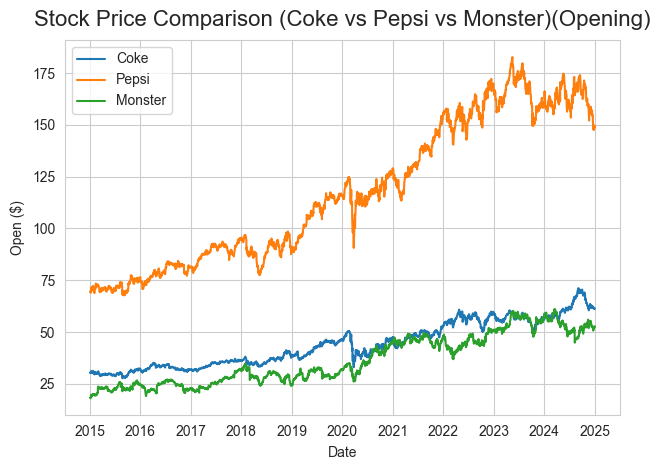

In [101]:
sns.lineplot(data=data, x='Date', y='Open', label="Coke")
sns.lineplot(data=data1, x='Date', y='Open', label="Pepsi")
sns.lineplot(data=data2, x='Date', y='Open', label="Monster")

plt.title("Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening)",fontsize=16,pad=10)
plt.xlabel("Date",fontsize=10,labelpad=5)
plt.ylabel("Open ($)",fontsize=10,labelpad=5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Output Images/Stock Price Comparison (Coke vs Pepsi vs Monster)(Opening).png",dpi=300,bbox_inches='tight')
plt.show()


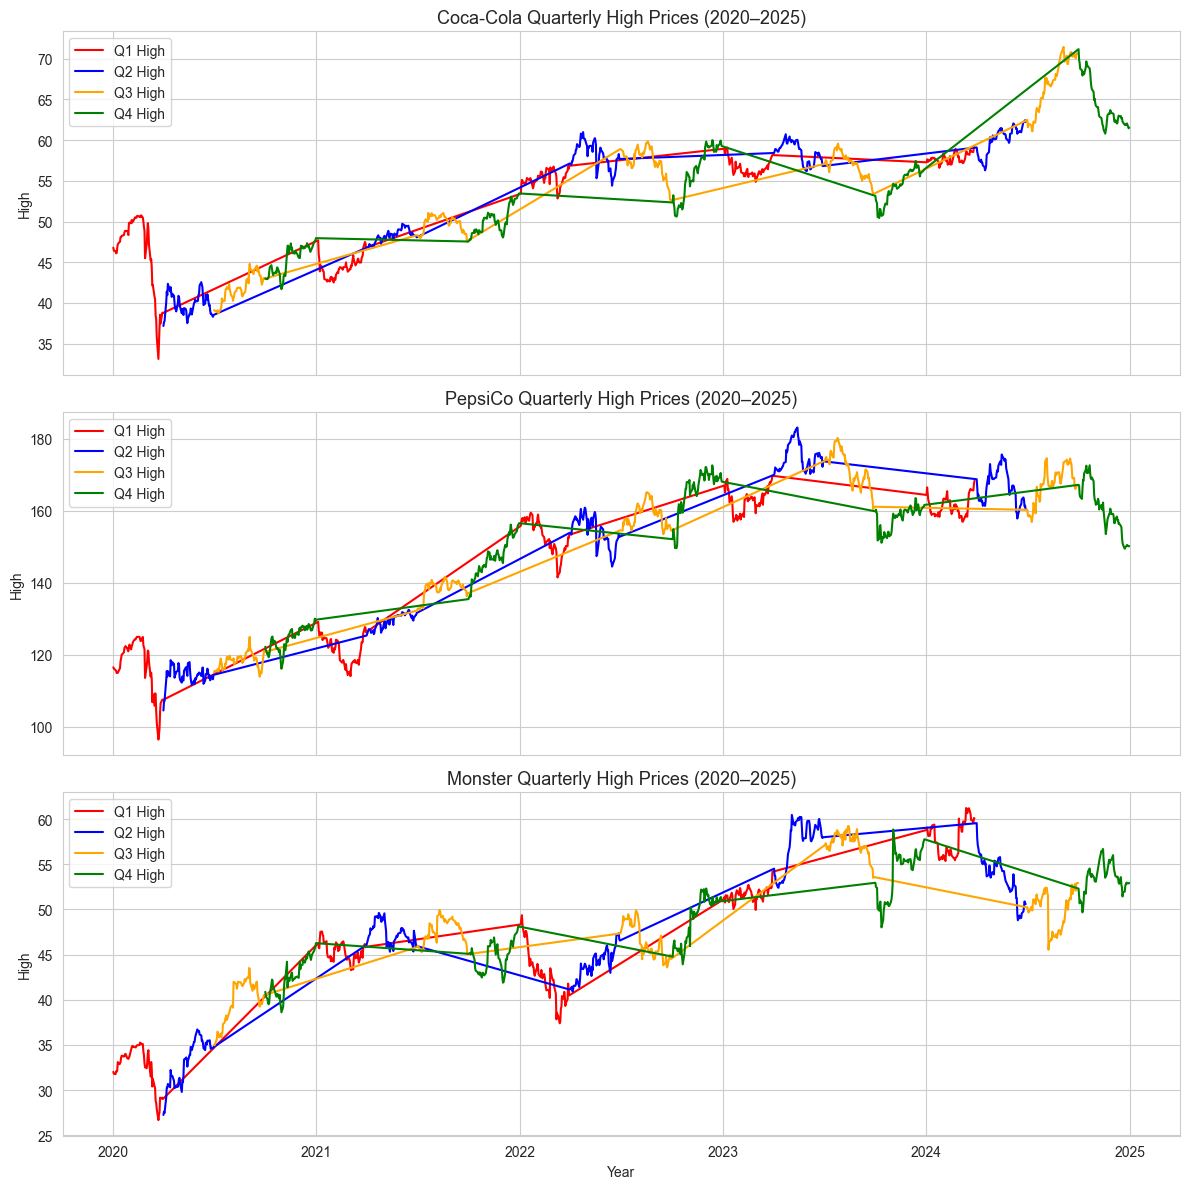

In [103]:
# Function to split quarters
def split_quarters(df):
    df = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2025)]
    quarters = {
        'Q1': df[df['Date'].dt.month.isin([1, 2, 3])],
        'Q2': df[df['Date'].dt.month.isin([4, 5, 6])],
        'Q3': df[df['Date'].dt.month.isin([7, 8, 9])],
        'Q4': df[df['Date'].dt.month.isin([10, 11, 12])]
    }
    return quarters

# Split data for Coca-Cola, Pepsi, Monster
quarters_coke = split_quarters(data)
quarters_pepsi = split_quarters(data1)
quarters_monster = split_quarters(data2)

# Colors for quarters
colors = {'Q1': 'red', 'Q2': 'blue', 'Q3': 'orange', 'Q4': 'green'}

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
companies = [('Coca-Cola', quarters_coke), ('PepsiCo', quarters_pepsi), ('Monster', quarters_monster)]

for ax, (title, quarters) in zip(axes, companies):
    for q, df in quarters.items():
        sns.lineplot(x='Date', y='High', data=df, ax=ax, label=f'{q} High', color=colors[q])
    ax.set_title(f'{title} Quarterly High Prices (2020–2025)', fontsize=13)
    ax.xaxis.set_major_locator(pltdates.YearLocator())
    ax.xaxis.set_major_formatter(pltdates.DateFormatter('%Y'))
    ax.legend()

# Final layout
plt.xlabel('Year')
plt.savefig("Output Images/Quaterly Performace of three companies.png",dpi=300,bbox_inches='tight')
plt.tight_layout()